## Top-5 Prediction Accuracy

In [ ]:
import pandas as pd

### Zero-shot setting

In [ ]:
# HumanQue_result
# Function to check if the expected token is in the top-5 predicted tokens
def is_expected_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is in the top-5 predicted tokens
    return expected_token in predicted_tokens[:5]

# Load the data from the uploaded file
file_path = 'HumanQue_result.csv'
data = pd.read_csv(file_path)

# Apply the function to each row in the dataframe
data['Expected_In_Top5'] = data.apply(lambda row: is_expected_in_top5(row['expected'], row['Top-k Predicted Tokens']), axis=1)

# Calculate the percentage
HumanQue_percentage = (data['Expected_In_Top5'].sum() / len(data)) * 100
HumanQue_percentage.round(2)


27.63

In [ ]:
# GeneralCorpus_result
# Function to check if the expected token is in the top-5 predicted tokens
def is_expected_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is in the top-5 predicted tokens
    return expected_token in predicted_tokens[:5]

# Load the data from the uploaded file
file_path = 'GeneralCorpus_result.csv'
data = pd.read_csv(file_path)

# Apply the function to each row in the dataframe
data['Expected_In_Top5'] = data.apply(lambda row: is_expected_in_top5(row['expected'], row['Top-k Predicted Tokens']), axis=1)

# Calculate the percentage
Corpus_percentage = (data['Expected_In_Top5'].sum() / len(data)) * 100
Corpus_percentage.round(2)

21.88

In [ ]:
# nonMetaphor_result
# Function to check if the expected token is in the top-5 predicted tokens
def is_expected_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is in the top-5 predicted tokens
    return expected_token in predicted_tokens[:5]

# Load the data from the uploaded file
file_path = 'nonMetaphor_result.csv'
data = pd.read_csv(file_path)

# Apply the function to each row in the dataframe
data['Expected_In_Top5'] = data.apply(lambda row: is_expected_in_top5(row['expected'], row['Top-k Predicted Tokens']), axis=1)

# Calculate the percentage
nonMeta_percentage = (data['Expected_In_Top5'].sum() / len(data)) * 100
nonMeta_percentage.round(2)

94.0

### Fine-tuning setting

In [ ]:
# HumanQue_unmasker_result
# Function to check if the expected token is in the top-5 predicted tokens
def is_expected_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is in the top-5 predicted tokens
    return expected_token in predicted_tokens[:5]

# Load the data from the uploaded file
file_path = 'Transformed_HumanQue_unmasker_results.csv'
data = pd.read_csv(file_path)

# Apply the function to each row in the dataframe
data['Expected_In_Top5'] = data.apply(lambda row: is_expected_in_top5(row['expected'], row['token_str']), axis=1)

# Calculate the percentage
HumanQue_finetune_percentage = (data['Expected_In_Top5'].sum() / len(data)) * 100
HumanQue_finetune_percentage.round(2)

75.88

In [ ]:
# Corpus_unmasker_result
# Function to check if the expected token is in the top-5 predicted tokens
def is_expected_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is in the top-5 predicted tokens
    return expected_token in predicted_tokens[:5]

# Load the data from the uploaded file
try:
    data = pd.read_csv('Transformed_Corpus_unmasker_results.csv')
except UnicodeDecodeError:
    data = pd.read_csv('Transformed_Corpus_unmasker_results.csv', encoding='ISO-8859-1')


# Apply the function to each row in the dataframe
data['Expected_In_Top5'] = data.apply(lambda row: is_expected_in_top5(row['expected'], row['token_str']), axis=1)

# Calculate the percentage
Corpus_finetune_percentage = (data['Expected_In_Top5'].sum() / len(data)) * 100
Corpus_finetune_percentage.round(2)

57.29

In [ ]:
# nonMetaphor_unmasker_result
# Function to check if the expected token is in the top-5 predicted tokens
def is_expected_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is in the top-5 predicted tokens
    return expected_token in predicted_tokens[:5]

# Load the data from the uploaded file
try:
    data = pd.read_csv('Transformed_nonMetaphor_unmasker_results.csv')
except UnicodeDecodeError:
    data = pd.read_csv('Transformed_nonMetaphor_unmasker_results.csv', encoding='ISO-8859-1')

# Apply the function to each row in the dataframe
data['Expected_In_Top5'] = data.apply(lambda row: is_expected_in_top5(row['expected'], row['token_str']), axis=1)

# Calculate the percentage
nonMeta_finetune_percentage = (data['Expected_In_Top5'].sum() / len(data)) * 100
nonMeta_finetune_percentage.round(2)

88.0

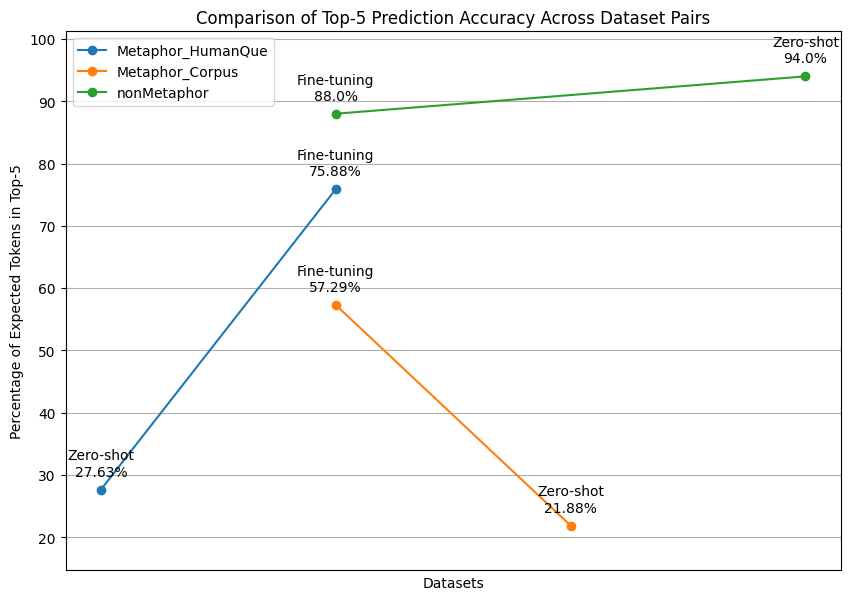

In [ ]:
import matplotlib.pyplot as plt

# Define your dataset pairs and their respective percentages
dataset_pairs = [
    ("Metaphor_HumanQue", HumanQue_percentage, HumanQue_finetune_percentage),
    ("Metaphor_Corpus", Corpus_percentage, Corpus_finetune_percentage),
    ("nonMetaphor", nonMeta_percentage, nonMeta_finetune_percentage)
]

plt.figure(figsize=(10, 7))

# Variables to dynamically adjust the y-axis limits
min_percentage = 100
max_percentage = 0

# Iterate over each pair and plot the line
for pair in dataset_pairs:
    dataset_name, zero_shot_val, fine_tuned_val = pair

    # Update min and max percentage for y-axis adjustment
    min_percentage = min(min_percentage, zero_shot_val, fine_tuned_val)
    max_percentage = max(max_percentage, zero_shot_val, fine_tuned_val)

    # Plot the line
    plt.plot([dataset_name, ''], [zero_shot_val, fine_tuned_val], marker='o', label=dataset_name)

    # Annotate the zero-shot and fine-tuning dataset percentages
    plt.annotate(f"Zero-shot\n{round(zero_shot_val, 2)}%", (dataset_name, zero_shot_val), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"Fine-tuning\n{round(fine_tuned_val, 2)}%", ('', fine_tuned_val), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Comparison of Top-5 Prediction Accuracy Across Dataset Pairs')
plt.ylabel('Percentage of Expected Tokens in Top-5')
plt.xlabel('Datasets')
plt.xticks([])
plt.legend()
plt.grid(True)

# Adjust y-axis limits
padding = (max_percentage - min_percentage) * 0.1  # 10% of the range as padding
plt.ylim(min_percentage - padding, max_percentage + padding)

plt.show()


## Top-1 Prediction Accuracy

### Zero-shot setting

In [ ]:
import pandas as pd

# Reload the dataset
file_path = 'HumanQue_result.csv'
data = pd.read_csv(file_path)

# Function to check if the expected token is the top-1 predicted token among the top-5
def is_expected_top1_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is the top-1 token among the top-5 predicted tokens
    return expected_token == predicted_tokens[0]

# Apply the function to each row in the dataframe
data['Expected_Top1_In_Top5'] = data.apply(lambda row: is_expected_top1_in_top5(row['expected'], row['Top-k Predicted Tokens']), axis=1)

# Calculate the percentage
HumanQue_percentage_top1_in_top5 = (data['Expected_Top1_In_Top5'].sum() / len(data)) * 100
HumanQue_percentage_top1_in_top5.round(2)


9.21

In [ ]:

# Reload the dataset
file_path = 'GeneralCorpus_result.csv'
data = pd.read_csv(file_path)

# Function to check if the expected token is the top-1 predicted token among the top-5
def is_expected_top1_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is the top-1 token among the top-5 predicted tokens
    return expected_token == predicted_tokens[0]

# Apply the function to each row in the dataframe
data['Expected_Top1_In_Top5'] = data.apply(lambda row: is_expected_top1_in_top5(row['expected'], row['Top-k Predicted Tokens']), axis=1)

# Calculate the percentage
Corpus_percentage_top1_in_top5 = (data['Expected_Top1_In_Top5'].sum() / len(data)) * 100
Corpus_percentage_top1_in_top5.round(2)


10.42

In [ ]:

# Reload the dataset
file_path = 'nonMetaphor_result.csv'
data = pd.read_csv(file_path)

# Function to check if the expected token is the top-1 predicted token among the top-5
def is_expected_top1_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is the top-1 token among the top-5 predicted tokens
    return expected_token == predicted_tokens[0]

# Apply the function to each row in the dataframe
data['Expected_Top1_In_Top5'] = data.apply(lambda row: is_expected_top1_in_top5(row['expected'], row['Top-k Predicted Tokens']), axis=1)

# Calculate the percentage
nonMeta_percentage_top1_in_top5 = (data['Expected_Top1_In_Top5'].sum() / len(data)) * 100
nonMeta_percentage_top1_in_top5.round(2)


62.0

### Fine-tuning setting

In [ ]:
# Reload the dataset
file_path = 'Transformed_HumanQue_unmasker_results.csv'
data = pd.read_csv(file_path)

# Function to check if the expected token is the top-1 predicted token among the top-5
def is_expected_top1_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is the top-1 token among the top-5 predicted tokens
    return expected_token == predicted_tokens[0]

# Apply the function to each row in the dataframe
data['Expected_Top1_In_Top5'] = data.apply(lambda row: is_expected_top1_in_top5(row['expected'], row['token_str']), axis=1)

# Calculate the percentage
HumanQue_fineT_percentage_top1_in_top5 = (data['Expected_Top1_In_Top5'].sum() / len(data)) * 100
HumanQue_fineT_percentage_top1_in_top5.round(2)


46.05

In [ ]:
# Load the data from the uploaded file
try:
    data = pd.read_csv('Transformed_Corpus_unmasker_results.csv')
except UnicodeDecodeError:
    data = pd.read_csv('Transformed_Corpus_unmasker_results.csv', encoding='ISO-8859-1')

# Function to check if the expected token is the top-1 predicted token among the top-5
def is_expected_top1_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is the top-1 token among the top-5 predicted tokens
    return expected_token == predicted_tokens[0]

# Apply the function to each row in the dataframe
data['Expected_Top1_In_Top5'] = data.apply(lambda row: is_expected_top1_in_top5(row['expected'], row['token_str']), axis=1)

# Calculate the percentage
Corpus_fineT_percentage_top1_in_top5 = (data['Expected_Top1_In_Top5'].sum() / len(data)) * 100
Corpus_fineT_percentage_top1_in_top5.round(2)


30.21

In [ ]:
# Load the data from the uploaded file
try:
    data = pd.read_csv('Transformed_nonMetaphor_unmasker_results.csv')
except UnicodeDecodeError:
    data = pd.read_csv('Transformed_nonMetaphor_unmasker_results.csv', encoding='ISO-8859-1')

# Function to check if the expected token is the top-1 predicted token among the top-5
def is_expected_top1_in_top5(expected_token, predicted_tokens_str):
    # Convert the string representation of list to an actual list
    predicted_tokens = predicted_tokens_str.strip("[]").replace("'", "").split(", ")
    # Check if the expected token is the top-1 token among the top-5 predicted tokens
    return expected_token == predicted_tokens[0]

# Apply the function to each row in the dataframe
data['Expected_Top1_In_Top5'] = data.apply(lambda row: is_expected_top1_in_top5(row['expected'], row['token_str']), axis=1)

# Calculate the percentage
nonMeta_fineT_percentage_top1_in_top5 = (data['Expected_Top1_In_Top5'].sum() / len(data)) * 100
nonMeta_fineT_percentage_top1_in_top5.round(2)


70.0

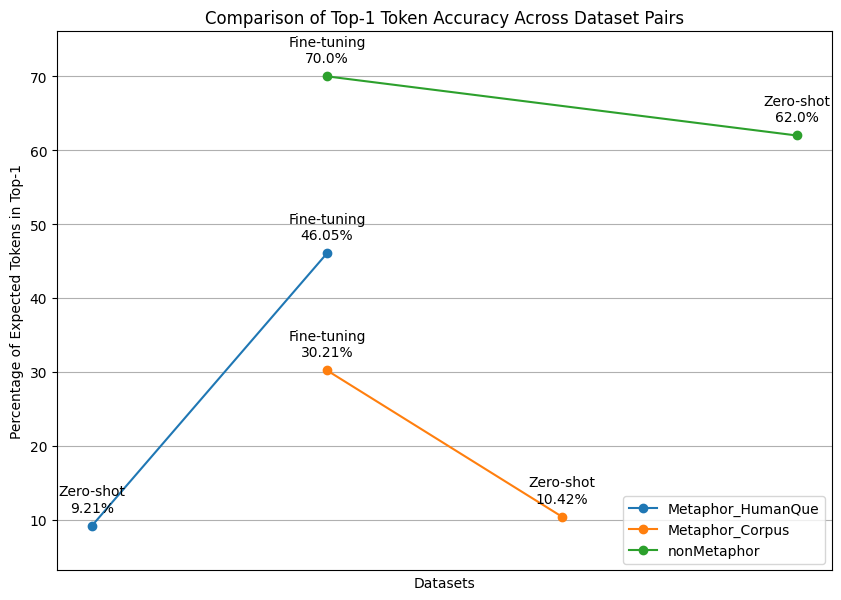

In [ ]:
import matplotlib.pyplot as plt

# Define your dataset pairs and their respective percentages
dataset_pairs = [
    ("Metaphor_HumanQue", HumanQue_percentage_top1_in_top5, HumanQue_fineT_percentage_top1_in_top5),
    ("Metaphor_Corpus", Corpus_percentage_top1_in_top5, Corpus_fineT_percentage_top1_in_top5),
    ("nonMetaphor", nonMeta_percentage_top1_in_top5, nonMeta_fineT_percentage_top1_in_top5)
]

plt.figure(figsize=(10, 7))

# Variables to dynamically adjust the y-axis limits
min_percentage = 100
max_percentage = 0

# Iterate over each pair and plot the line
for pair in dataset_pairs:
    dataset_name, zero_shot_val, fine_tuned_val = pair

    # Update min and max percentage for y-axis adjustment
    min_percentage = min(min_percentage, zero_shot_val, fine_tuned_val)
    max_percentage = max(max_percentage, zero_shot_val, fine_tuned_val)

    # Plot the line
    plt.plot([dataset_name, ''], [zero_shot_val, fine_tuned_val], marker='o', label=dataset_name)

    # Annotate the zero-shot and fine-tuning dataset percentages
    plt.annotate(f"Zero-shot\n{round(zero_shot_val, 2)}%", (dataset_name, zero_shot_val), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f"Fine-tuning\n{round(fine_tuned_val, 2)}%", ('', fine_tuned_val), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Comparison of Top-1 Token Accuracy Across Dataset Pairs')
plt.ylabel('Percentage of Expected Tokens in Top-1')
plt.xlabel('Datasets')
plt.xticks([])
plt.legend()
plt.grid(True)

plt.legend(loc='lower right')
# Adjust y-axis limits
padding = (max_percentage - min_percentage) * 0.1  # 10% of the range as padding
plt.ylim(min_percentage - padding, max_percentage + padding)

plt.show()